<a href="https://colab.research.google.com/github/ayushiiii28/Intent-code/blob/main/Intent_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Load the dataset
df = pd.read_csv("/content/data.csv")  # replace with your path if needed

# Step 3: Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=2)
X_tfidf = tfidf.fit_transform(df['sentence'])

# Step 4: Clustering using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Step 5: Add the predicted cluster labels to the DataFrame
df['cluster_label'] = clusters

# Step 6: Evaluate clustering performance (optional)
sil_score = silhouette_score(X_tfidf, clusters)
print("Silhouette Score:", sil_score)

# Step 7: Save results to CSV
df.to_csv("intent_clusters_output.csv", index=False)
print("Clustered data saved to 'intent_clusters_output.csv'")


Silhouette Score: 0.12987850349504101
Clustered data saved to 'intent_clusters_output.csv'


In [ ]:
import pandas as pd

df = pd.read_csv("intent_clusters_output.csv")

# View random sample from each cluster
for label in sorted(df['cluster_label'].unique()):
    print(f"\n--- Cluster {label} ---")
    print(df[df['cluster_label'] == label]['sentence'].sample(5).to_list())



--- Cluster 0 ---
['Will I get an option to Customise the size', 'Need some help in changing size of the mattress', 'What size to order?', 'How do I know the size of my bed?', 'Mattress size']

--- Cluster 1 ---
['Why SOF mattress', 'Can I try a mattress first', 'Tell me about SOF Mattress', 'SOF ortho', 'What are the SOF mattress products']

--- Cluster 2 ---
['Shop near by', 'Is delivery possible on this pincode', 'DO you have COD option', 'I wanna know the difference', 'Can I get free trial']

--- Cluster 3 ---
['0% EMI.', 'I need emi payment.', 'Do you accept Paisa EMI card', 'Do you offer Zero Percent EMI payment options?', 'Is EMI available']

--- Cluster 4 ---
['What are the key features of the SOF Ergo mattress', 'Ergo', 'Features of Ortho mattress', 'What are the mattress features', 'SOF ergo features']

--- Cluster 5 ---
['What is the cost', 'Custom size cost', 'Cost of Mattress', 'Mattress cost', 'Cost of mattress']

--- Cluster 6 ---
['I want to buy pillows', 'I want to bu

In [ ]:
pip install sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data
df = pd.read_csv("/content/data.csv")  # adjust path

# Load SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create sentence embeddings
embeddings = model.encode(df['sentence'], show_progress_bar=True)

# Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
sbert_clusters = kmeans.fit_predict(embeddings)

# Add to DataFrame
df['sbert_cluster'] = sbert_clusters

# Evaluate
sil_score = silhouette_score(embeddings, sbert_clusters)
print(f"SBERT Clustering Silhouette Score: {sil_score}")

# Save
df.to_csv("sbert_clusters_output.csv", index=False)


Batches:   0%|          | 0/11 [00:00<?, ?it/s]

SBERT Clustering Silhouette Score: 0.12066186219453812


TF-IDF Clustering Silhouette Score: 0.2064
SBERT Clustering Silhouette Score: 0.1954


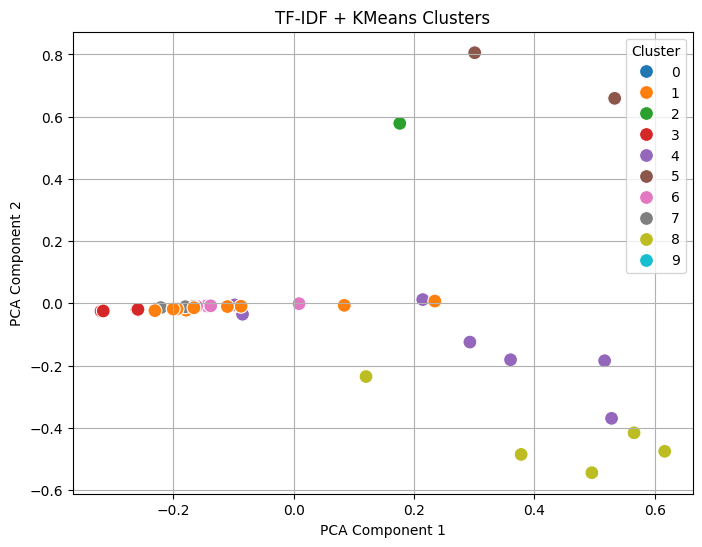

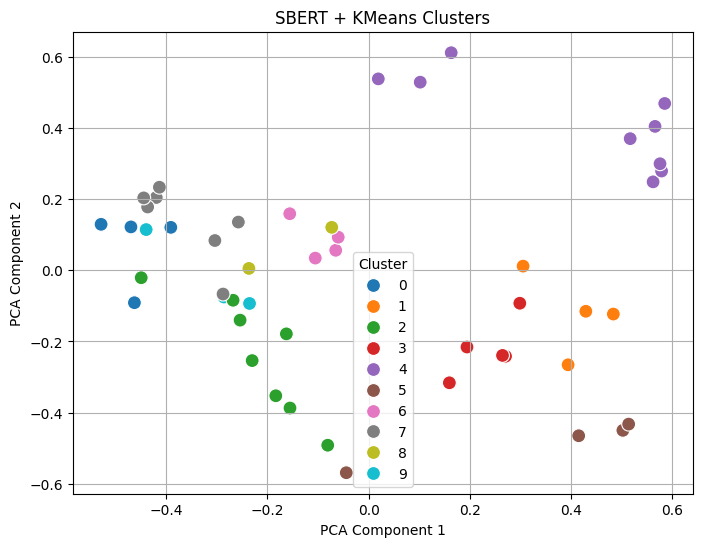

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

from sentence_transformers import SentenceTransformer
import numpy as np

# --- Sample Data (Replace with your own) ---
data = pd.DataFrame({
    'text': [
        'Custom size', 'Help me with the size chart', 'Customise size',
        'Will I get an option to Customise the size', 'Need some help in changing size of the mattress',
        'Can I try a mattress first', 'Tell me about SOF Ortho mattress',
        'What are the key features of the SOF Ortho mattress', 'What is SOF mattress',
        'How is SOF different from other mattress brands',
        'Difference between the products', 'Arrange a call back', 'What is 100 Night trial offer',
        'Do you have any showrooms in Delhi state', 'Interested in buying',
        'Do you accept Paisa EMI card', 'what about emi options', 'How to get in EMI',
        'How to EMI', 'I need emi payment.',
        'Features of Ergo mattress', 'What is the difference between the Ergo & Ortho variants',
        'SOF ergo features', 'What are the key features of the SOF Ergo mattress', 'Ergo features',
        'Cost of Mattress', 'Cost', 'How Much Cost', 'Cost of Bed', 'Mattress cost',
        'Which mattress to buy?', 'I want to buy a mattress', 'Where can I see the product before I buy',
        'I want to buy this', 'Can we buy through Paisa finance',
        'Process of cancelling order', 'I did not receive my order yet',
        'Track order', 'What is my order status?', 'Status of my order',
        'Want to know the price', 'I want in installment', 'I want it on 0% interest',
        'Want to know the discount', 'Want to talk to an live agent',
        'Need pair of Pillows', 'Are Pillows available', 'Is pillows available',
        'Pillows', 'Do you sell pillows?'
    ]
})

# --- TF-IDF + KMeans ---
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=1)
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])

k = 10
kmeans_tfidf = KMeans(n_clusters=k, random_state=42)
tfidf_labels = kmeans_tfidf.fit_predict(X_tfidf)

sil_score_tfidf = silhouette_score(X_tfidf, tfidf_labels)
print(f"TF-IDF Clustering Silhouette Score: {sil_score_tfidf:.4f}")

# --- SBERT + KMeans ---
model = SentenceTransformer('all-MiniLM-L6-v2')
sbert_embeddings = model.encode(data['text'])

kmeans_sbert = KMeans(n_clusters=k, random_state=42)
sbert_labels = kmeans_sbert.fit_predict(sbert_embeddings)

sil_score_sbert = silhouette_score(sbert_embeddings, sbert_labels)
print(f"SBERT Clustering Silhouette Score: {sil_score_sbert:.4f}")

# --- Plotting Function ---
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette='tab10', s=100)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.show()

# --- Visualize ---
plot_clusters(X_tfidf.toarray(), tfidf_labels, "TF-IDF + KMeans Clusters")
plot_clusters(sbert_embeddings, sbert_labels, "SBERT + KMeans Clusters")


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
dbscan_labels = dbscan.fit_predict(sbert_embeddings)

# Remove noise points for silhouette
filtered_embeddings = sbert_embeddings[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

if len(set(filtered_labels)) > 1:
    dbscan_score = silhouette_score(filtered_embeddings, filtered_labels)
    print("SBERT + DBSCAN Silhouette Score:", dbscan_score)
else:
    print("SBERT + DBSCAN did not form enough clusters for scoring.")


SBERT + DBSCAN Silhouette Score: 0.19606851


In [ ]:
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=5, metric='euclidean')
hdb_labels = hdb.fit_predict(sbert_embeddings)

if len(set(hdb_labels)) > 1:
    hdb_score = silhouette_score(sbert_embeddings[hdb_labels != -1], hdb_labels[hdb_labels != -1])
    print("SBERT + HDBSCAN Silhouette Score:", hdb_score)
else:
    print("SBERT + HDBSCAN did not form enough clusters for scoring.")


SBERT + HDBSCAN did not form enough clusters for scoring.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import umap

umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine')
umap_embeddings = umap_model.fit_transform(sbert_embeddings)

kmeans_umap = KMeans(n_clusters=5, random_state=42)
umap_labels = kmeans_umap.fit_predict(umap_embeddings)

umap_score = silhouette_score(umap_embeddings, umap_labels)
print("SBERT + UMAP + KMeans Silhouette Score:", umap_score)


SBERT + UMAP + KMeans Silhouette Score: 0.39087802


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg = AgglomerativeClustering(n_clusters=5)
agg_labels = agg.fit_predict(X_tfidf.toarray())

agg_score = silhouette_score(X_tfidf, agg_labels)
print("TF-IDF + Agglomerative Clustering Silhouette Score:", agg_score)


TF-IDF + Agglomerative Clustering Silhouette Score: 0.15588352316631496


In [ ]:
agg_sbert = AgglomerativeClustering(n_clusters=5)
agg_sbert_labels = agg_sbert.fit_predict(sbert_embeddings)

agg_sbert_score = silhouette_score(sbert_embeddings, agg_sbert_labels)
print("SBERT + Agglomerative Clustering Silhouette Score:", agg_sbert_score)


SBERT + Agglomerative Clustering Silhouette Score: 0.16733284


In [ ]:
from sentence_transformers import SentenceTransformer
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Load your data
# Make sure 'data' has a column 'text'
# Example: data = pd.read_csv("your_dataset.csv")

# Step 1: SBERT Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
sbert_embeddings = model.encode(data['text'].tolist(), show_progress_bar=True)

# Step 2: UMAP Dimensionality Reduction
umap_model = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='cosine', random_state=42)
umap_embeddings = umap_model.fit_transform(sbert_embeddings)

# Step 3: KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(umap_embeddings)

# Silhouette Score
sil_score = silhouette_score(umap_embeddings, kmeans_labels)
print(f"\nSilhouette Score (SBERT + UMAP + KMeans): {sil_score:.3f}")


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Silhouette Score (SBERT + UMAP + KMeans): 0.489


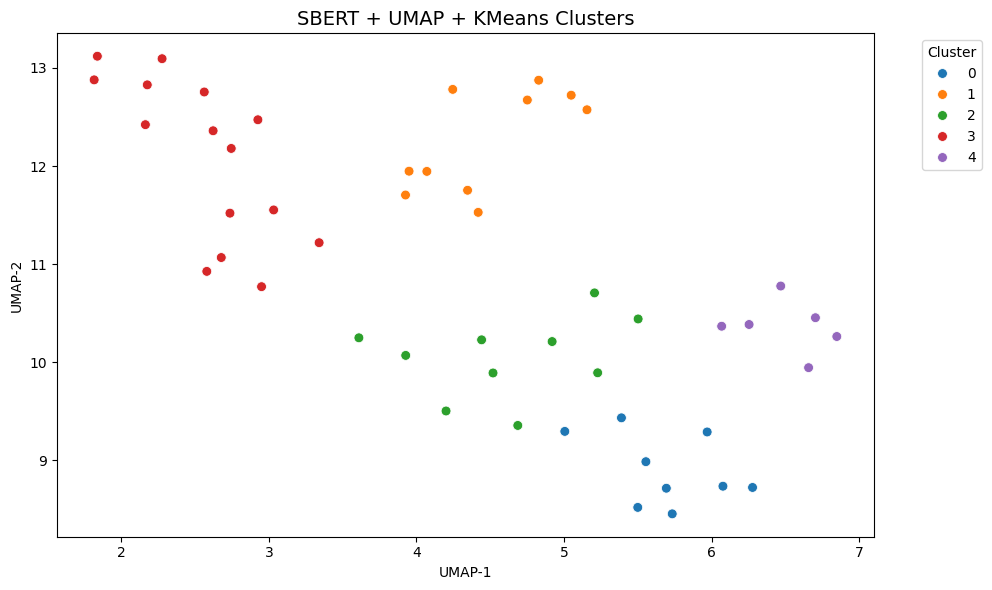

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=kmeans_labels, palette='tab10', s=50)
plt.title('SBERT + UMAP + KMeans Clusters', fontsize=14)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
data['cluster'] = kmeans_labels

for i in sorted(data['cluster'].unique()):
    print(f"\n🌀 Cluster {i} - Sample texts:")
    print("\n".join(data[data['cluster'] == i]['text'].iloc[:3].tolist()))



🌀 Cluster 0 - Sample texts:
Do you have any showrooms in Delhi state
Do you accept Paisa EMI card
what about emi options

🌀 Cluster 1 - Sample texts:
Custom size
Help me with the size chart
Customise size

🌀 Cluster 2 - Sample texts:
Difference between the products
What is 100 Night trial offer
Interested in buying

🌀 Cluster 3 - Sample texts:
Can I try a mattress first
Tell me about SOF Ortho mattress
What are the key features of the SOF Ortho mattress

🌀 Cluster 4 - Sample texts:
Arrange a call back
Process of cancelling order
I did not receive my order yet


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(data['text'])

def get_top_keywords(tfidf_matrix, cluster_labels, features, top_n=5):
    for cluster_num in np.unique(cluster_labels):
        cluster_idx = np.where(cluster_labels == cluster_num)
        mean_tfidf = np.mean(tfidf_matrix[cluster_idx], axis=0)
        top_indices = np.array(mean_tfidf).flatten().argsort()[-top_n:][::-1]
        keywords = [features[i] for i in top_indices]
        print(f"\nCluster {cluster_num} Keywords: {keywords}")

get_top_keywords(X_tfidf, kmeans_labels, vectorizer.get_feature_names_out())



Cluster 0 Keywords: ['emi', 'paisa', 'want', 'installment', 'options']

Cluster 1 Keywords: ['pillows', 'size', 'available', 'customise', 'help']

Cluster 2 Keywords: ['want', 'cost', 'buy', 'know', 'product']

Cluster 3 Keywords: ['mattress', 'sof', 'features', 'ergo', 'cost']

Cluster 4 Keywords: ['order', 'status', 'arrange', 'track', 'receive']


🔍 Generating SBERT embeddings...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

📉 Applying UMAP for dimensionality reduction...
🔗 Clustering with KMeans...
✅ Silhouette Score: 0.256
📊 Visualizing clusters in 2D...


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


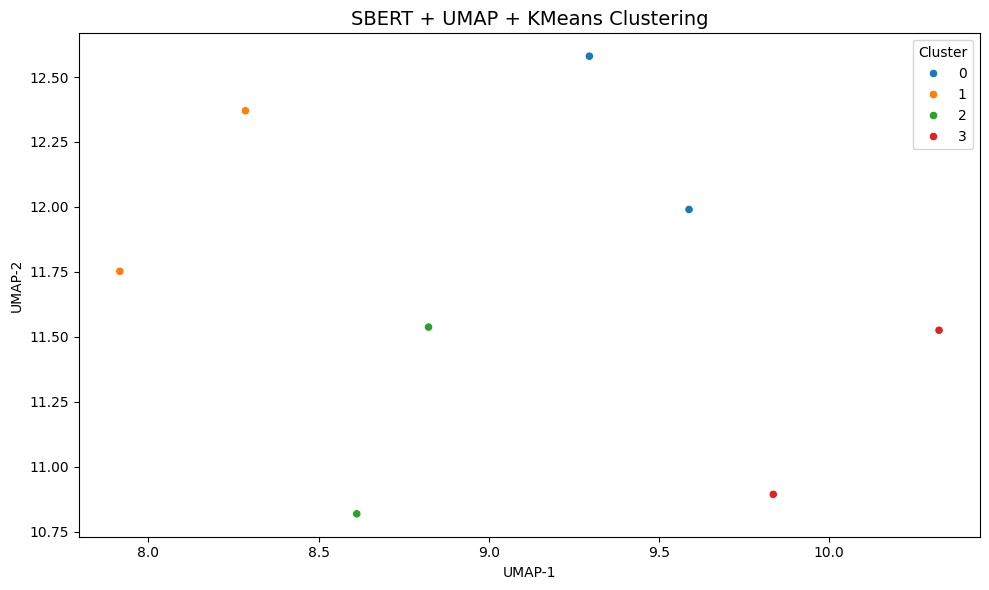


🔹 Cluster 0: Top 10 keywords
  - spaghetti
  - food
  - favorite
  - eating
  - pasta
  - pizza
  - love
  - unpredictable
  - stock
  - risky

🔹 Cluster 1: Top 10 keywords
  - unpredictable
  - stock
  - risky
  - rewarding
  - market
  - investing
  - pizza
  - pasta
  - machine
  - spaghetti

🔹 Cluster 2: Top 10 keywords
  - learning
  - machine
  - amazing
  - deep
  - enables
  - ai
  - applications
  - spaghetti
  - stock
  - unpredictable

🔹 Cluster 3: Top 10 keywords
  - loyal
  - dogs
  - cute
  - companions
  - cats
  - animals
  - stock
  - spaghetti
  - rewarding
  - unpredictable

📁 Results saved to clustered_texts.csv


In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
import umap

# -----------------------------
# STEP 1: Input Your Data
# -----------------------------
texts = [
    # Add your text data here (list of strings)
    "Machine learning is amazing.",
    "Deep learning enables many AI applications.",
    "I love eating pizza and pasta.",
    "Spaghetti is my favorite food.",
    "The stock market is unpredictable.",
    "Investing can be risky but rewarding.",
    "Cats are cute animals.",
    "Dogs are loyal companions."
]

# -----------------------------
# STEP 2: Embed with Sentence-BERT
# -----------------------------
print("🔍 Generating SBERT embeddings...")
model = SentenceTransformer('all-MiniLM-L6-v2')
sbert_embeddings = model.encode(texts, show_progress_bar=True)

# -----------------------------
# STEP 3: UMAP Dimensionality Reduction
# -----------------------------
print("📉 Applying UMAP for dimensionality reduction...")
umap_reducer = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine')
umap_embeddings = umap_reducer.fit_transform(sbert_embeddings)

# -----------------------------
# STEP 4: KMeans Clustering
# -----------------------------
print("🔗 Clustering with KMeans...")
num_clusters = 4  # Change this based on your use-case
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
umap_labels = kmeans.fit_predict(umap_embeddings)

sil_score = silhouette_score(umap_embeddings, umap_labels)
print(f"✅ Silhouette Score: {sil_score:.3f}")

# -----------------------------
# STEP 5: 2D Visualization
# -----------------------------
print("📊 Visualizing clusters in 2D...")
umap_2d = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(sbert_embeddings)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_2d[:, 0], y=umap_2d[:, 1], hue=umap_labels, palette="tab10")
plt.title("SBERT + UMAP + KMeans Clustering", fontsize=14)
plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# -----------------------------
# STEP 6: Cluster Keywords Extraction
# -----------------------------
def print_top_keywords(texts, labels, top_n=10):
    tfidf = TfidfVectorizer(stop_words='english')
    X = tfidf.fit_transform(texts)
    terms = tfidf.get_feature_names_out()

    for i in np.unique(labels):
        cluster_texts = X[np.array(labels) == i]
        mean_tfidf = np.asarray(cluster_texts.mean(axis=0)).flatten()
        top_terms = mean_tfidf.argsort()[::-1][:top_n]
        print(f"\n🔹 Cluster {i}: Top {top_n} keywords")
        for idx in top_terms:
            print(f"  - {terms[idx]}")

print_top_keywords(texts, umap_labels)

# -----------------------------
# STEP 7: Save Results
# -----------------------------
df = pd.DataFrame({'text': texts, 'cluster': umap_labels})
df.to_csv("clustered_texts.csv", index=False)
print("\n📁 Results saved to clustered_texts.csv")




/usr/local/lib/python3.11/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


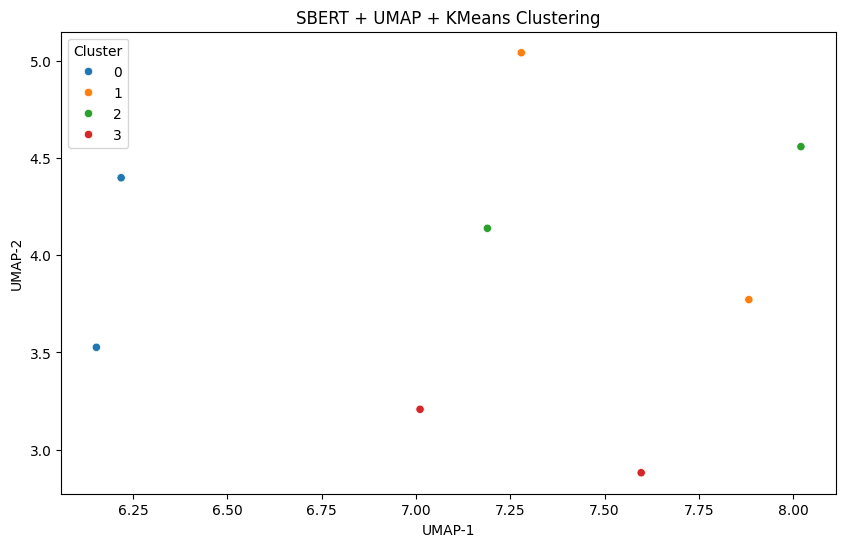

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for visualization
umap_2d = umap.UMAP(n_components=2, metric='cosine').fit_transform(sbert_embeddings)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=umap_2d[:, 0], y=umap_2d[:, 1], hue=umap_labels, palette='tab10')
plt.title("SBERT + UMAP + KMeans Clustering")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

for cluster_num in set(umap_labels):
    print(f"\nCluster {cluster_num}:")
    cluster_texts = [texts[i] for i in range(len(texts)) if umap_labels[i] == cluster_num]

    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf = vectorizer.fit_transform(cluster_texts)
    top_terms = vectorizer.get_feature_names_out()

    print("Top terms:", ", ".join(top_terms))
    print("Sample text:", cluster_texts[0])



Cluster 0:
Top terms: eating, favorite, food, love, pasta, pizza, spaghetti
Sample text: I love eating pizza and pasta.

Cluster 1:
Top terms: investing, market, rewarding, risky, stock, unpredictable
Sample text: The stock market is unpredictable.

Cluster 2:
Top terms: ai, amazing, applications, deep, enables, learning, machine
Sample text: Machine learning is amazing.

Cluster 3:
Top terms: animals, cats, companions, cute, dogs, loyal
Sample text: Cats are cute animals.


In [ ]:
import numpy as np

# Save embeddings + labels for future use
np.save("umap_embeddings.npy", umap_embeddings)
np.save("umap_kmeans_labels.npy", umap_labels)
